In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import MaxPool2D

In [5]:
def max_pooling(image: np.ndarray) -> np.ndarray:
    rows, cols = image.shape
    output = np.zeros(shape=(rows // 2, cols // 2), dtype=np.float32)
    for i_out, i in enumerate(range(0, rows, 2)):
        for j_out, j in enumerate(range(0, cols, 2)):
            output[i_out, j_out] = np.max(image[i: i+2, j: j+2])
    return output

Prvious shape: (28, 28) current shape: (14, 14)
Pooled Image:
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  18.  18. 136. 175. 255. 247.   0.   0.]
 [  0.   0.   0.  49. 253. 253. 253. 253. 253. 225. 253. 195.   0.   0.]
 [  0.   0.   0.  18. 253. 253. 253. 198. 247.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  14. 154. 253.   2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  11. 253. 225. 108.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  81. 253. 253. 150.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  16. 252. 253.  64.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 148. 253. 253. 253.   2.   0.   0.   0.]
 [  0.   0.   0.   0.  66. 253. 253. 253. 253.  78.   0.   0.   0.   0.]
 [  0.   0. 172. 253. 253. 253. 253.  80.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 253. 253. 212. 132.   0.   0.   0.   0.   0.   0. 

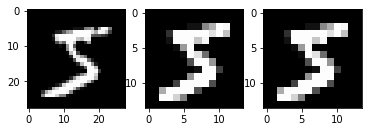

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image = x_train[0]
image = image.reshape((28, 28)).astype(np.float32)

pooling_image = max_pooling(image)

print(f"Prvious shape: {image.shape} current shape: {pooling_image.shape}")
print(f"Pooled Image:\n{pooling_image.squeeze()}")

layer = MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')
pooling_image_tf = layer(image.reshape((1, 28, 28, 1))).numpy()
print(f"Pooled Image TF:\n{pooling_image_tf.squeeze()}")
# assert np.allclose(pooling_image.flatten(), pooling_image_tf.flatten())

fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(image, cmap="gray")
axs[1].imshow(pooling_image, cmap="gray")
axs[2].imshow(pooling_image_tf.squeeze(), cmap="gray")
plt.show()